In [1]:
#importing the needed libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading/opening the csv file so work can be done on it
tweetsDf= pd.read_csv('Tweets.csv')

In [3]:
#shows all the columns in the data pre pre data cleaning
tweetsDf.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [4]:
#shows the first five rows of the untouched data
tweetsDf.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


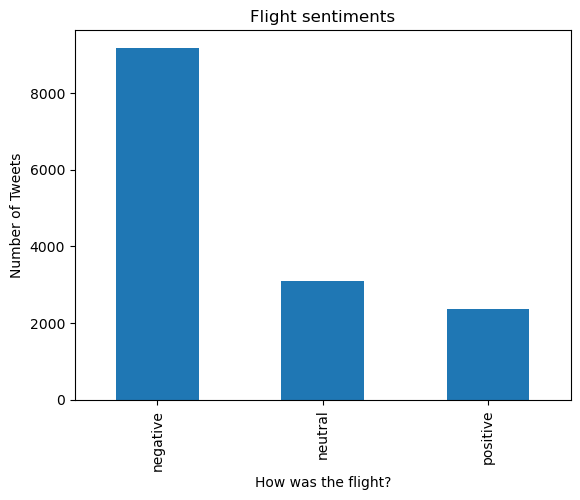

In [5]:
#We are now filtering the data and selecting the 'airline_sentiment' columns and getting the unique counts for each sentiment
negativeReason = tweetsDf['airline_sentiment'].value_counts()
#plotting the histogram
negativeReason.plot(kind='bar')
#Giving it a title
plt.title('Flight sentiments')
#label for the x-axis
plt.xlabel('How was the flight?')
#label for the y axis
plt.ylabel('Number of Tweets')
#Showing the plotted graph
plt.show()

<Figure size 2000x4000 with 0 Axes>

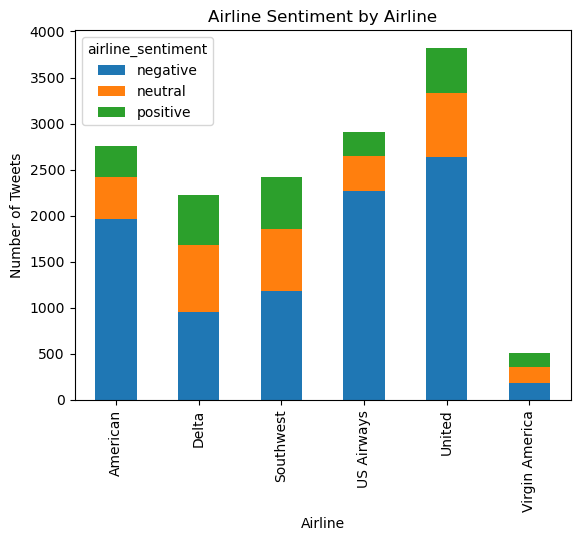

In [6]:
#grouping the alines and their sentiments and t and visualizing them
# BEFORE showing only the negatives
grouped = tweetsDf.groupby(['airline', 'airline_sentiment']).size().unstack()

fig = plt.figure(figsize = (20,40))
grouped.plot(kind='bar', stacked=True)
plt.title('Airline Sentiment by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')
plt.show()


In [7]:
#selecting ONLY the negative sentiments by airline
tweetsDf=tweetsDf[tweetsDf['airline_sentiment']== 'negative']

<Figure size 2000x4000 with 0 Axes>

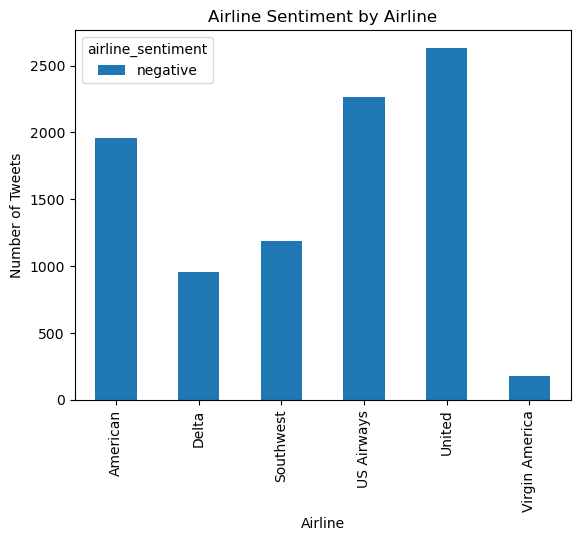

In [8]:
#grouping the alines and their sentiments and t and visualizing them
grouped = tweetsDf.groupby(['airline', 'airline_sentiment']).size().unstack()

fig = plt.figure(figsize = (20,40))
grouped.plot(kind='bar', stacked=True)
plt.title('Airline Sentiment by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')
plt.show()

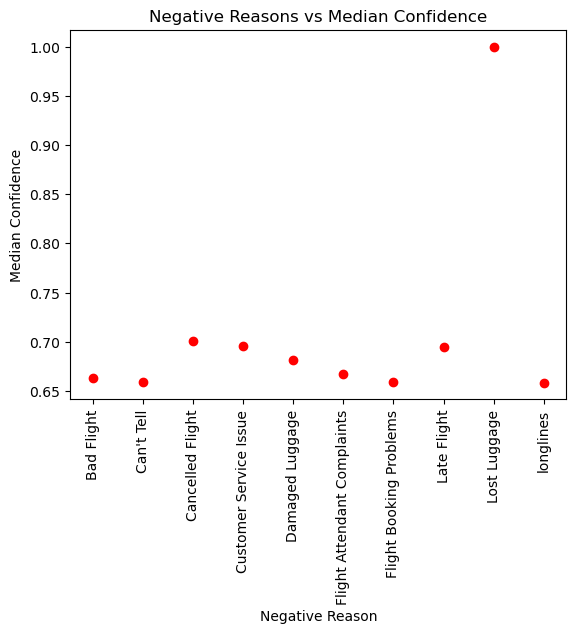

In [9]:
# group data by negative reason and compute median confidence
grouped_data = tweetsDf.groupby('negativereason')['negativereason_confidence'].median()

# create scatter plot
plt.scatter(grouped_data.index, grouped_data, c='red')
plt.xticks(rotation=90)
plt.xlabel('Negative Reason')
plt.ylabel('Median Confidence')
plt.title('Negative Reasons vs Median Confidence')
plt.show()

In [10]:
tweetsDf = tweetsDf.drop('airline_sentiment_gold', axis =1)
tweetsDf = tweetsDf.drop('name', axis =1)
tweetsDf = tweetsDf.drop('negativereason_gold', axis =1)
tweetsDf = tweetsDf.drop('retweet_count', axis =1)
tweetsDf = tweetsDf.drop('text', axis =1)
tweetsDf = tweetsDf.drop('tweet_coord', axis =1)
tweetsDf = tweetsDf.drop('tweet_created', axis =1)
tweetsDf = tweetsDf.drop('tweet_location', axis =1)
tweetsDf = tweetsDf.drop('user_timezone', axis =1)
tweetsDf = tweetsDf.drop('tweet_id', axis =1)

In [11]:
# BEFORE
from sklearn.feature_extraction.text import CountVectorizer

# Count word frequencies
vectorizer = CountVectorizer()
word_counts = vectorizer.fit_transform(tweetsDf['negativereason'])

# Get feature names and word frequencies
feature_names = vectorizer.get_feature_names()
before_word_freqs = word_counts.toarray().sum(axis=0)

# Create a dataframe with word frequencies
before_word_freq_df = pd.DataFrame({'word': feature_names, 'frequency': before_word_freqs})

# Sort the dataframe by word frequency
before_word_freq_df = before_word_freq_df.sort_values('frequency', ascending=False)

# Print the top 10 most frequent words
print(before_word_freq_df.head(20))

          word  frequency
8       flight       4102
6     customer       2910
15     service       2910
9        issue       2910
10        late       1665
16        tell       1190
3          can       1190
4    cancelled        847
13     luggage        798
12        lost        724
1          bad        580
14    problems        529
2      booking        529
5   complaints        481
0    attendant        481
11   longlines        178
7      damaged         74


/Users/ryanramcharan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
# Create a boolean mask to filter rows where the 'negativereason' column contains "Bad Flight"
mask1 = tweetsDf['negativereason'].str.contains("Bad Flight", na=False)

# Count and print the number of rows that will be dropped
print(len(tweetsDf[mask1]), 'rows dropped')

# Drop the rows from the DataFrame using the `drop` method and the `index` attribute of the filtered DataFrame
tweetsDf = tweetsDf.drop(tweetsDf[mask1].index)

580 rows dropped


In [13]:
mask2 = tweetsDf['negativereason'].str.contains("Can't Tell", na=False)
print(len(tweetsDf[mask2]), 'rows dropped')
tweetsDf = tweetsDf.drop(tweetsDf[mask2].index)

1190 rows dropped


In [14]:
# AFTER
from sklearn.feature_extraction.text import CountVectorizer

# Count word frequencies
vectorizer = CountVectorizer()
word_counts = vectorizer.fit_transform(tweetsDf['negativereason'])

# Get feature names and word frequencies
feature_names = vectorizer.get_feature_names()
after_word_freqs = word_counts.toarray().sum(axis=0)

# Create a dataframe with word frequencies
after_word_freq_df = pd.DataFrame({'word': feature_names, 'frequency': after_word_freqs})

# Sort the dataframe by word frequency
after_word_freq_df = after_word_freq_df.sort_values('frequency', ascending=False)

# Print the top 10 most frequent words
print(after_word_freq_df.head(25))

          word  frequency
6       flight       3522
4     customer       2910
7        issue       2910
13     service       2910
8         late       1665
2    cancelled        847
11     luggage        798
10        lost        724
1      booking        529
12    problems        529
0    attendant        481
3   complaints        481
9    longlines        178
5      damaged         74


/Users/ryanramcharan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
# Compare the feature matrices
print("Feature matrix for original data:\n", before_word_freq_df.head(25))
print(" ")
print("Feature matrix for data after dropping columns:\n", after_word_freq_df.head(25))

Feature matrix for original data:
           word  frequency
8       flight       4102
6     customer       2910
15     service       2910
9        issue       2910
10        late       1665
16        tell       1190
3          can       1190
4    cancelled        847
13     luggage        798
12        lost        724
1          bad        580
14    problems        529
2      booking        529
5   complaints        481
0    attendant        481
11   longlines        178
7      damaged         74
 
Feature matrix for data after dropping columns:
           word  frequency
6       flight       3522
4     customer       2910
7        issue       2910
13     service       2910
8         late       1665
2    cancelled        847
11     luggage        798
10        lost        724
1      booking        529
12    problems        529
0    attendant        481
3   complaints        481
9    longlines        178
5      damaged         74


As you can see up above 580 words of Bad & Flight, 1190 words of Can't & Tell was removed 

In [16]:
tweetsDf.head(10)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline
15,negative,0.6842,Late Flight,0.3684,Virgin America
24,negative,1.0000,Customer Service Issue,0.3557,Virgin America
25,negative,1.0000,Customer Service Issue,1.0000,Virgin America
30,negative,1.0000,Flight Booking Problems,1.0000,Virgin America
32,negative,1.0000,Customer Service Issue,1.0000,Virgin America
33,negative,1.0000,Customer Service Issue,1.0000,Virgin America
39,negative,1.0000,Customer Service Issue,1.0000,Virgin America
41,negative,0.6688,Flight Booking Problems,0.6688,Virgin America
55,negative,0.6939,Flight Booking Problems,0.6939,Virgin America
61,negative,1.0000,Customer Service Issue,1.0000,Virgin America


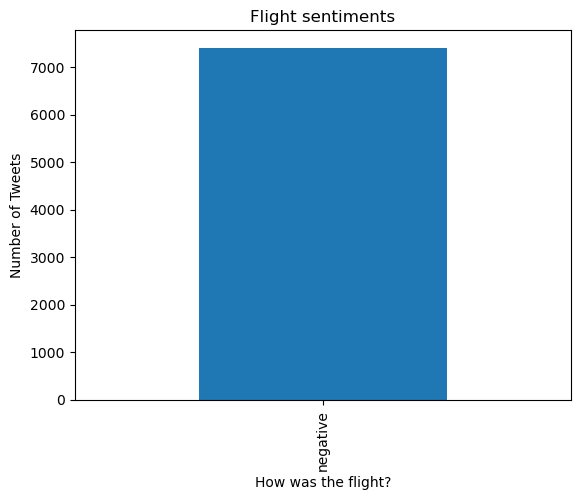

In [17]:
#We are now filtering the data and selecting the 'airline_sentiment' columns and getting the unique counts for each sentiment
negativeReason = tweetsDf['airline_sentiment'].value_counts()
#plotting the histogram
negativeReason.plot(kind='bar')
#Giving it a title
plt.title('Flight sentiments')
#label for the x-axis
plt.xlabel('How was the flight?')
#label for the y axis
plt.ylabel('Number of Tweets')
#Showing the plotted graph
plt.show()

In [18]:
#selecting ONLY the negative sentiments by airline
tweetsDf=tweetsDf[tweetsDf['airline_sentiment']== 'negative']

<Figure size 2000x4000 with 0 Axes>

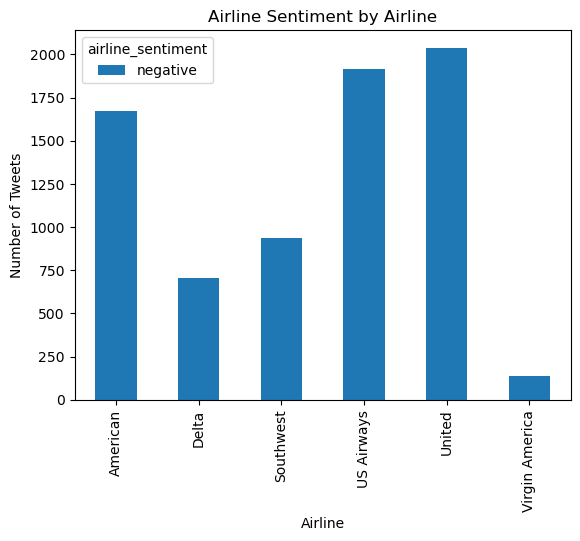

In [19]:
#grouping the alines and their sentiments and t and visualizing them
grouped = tweetsDf.groupby(['airline', 'airline_sentiment']).size().unstack()

fig = plt.figure(figsize = (20,40))
grouped.plot(kind='bar', stacked=True)
plt.title('Airline Sentiment by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')
plt.show()

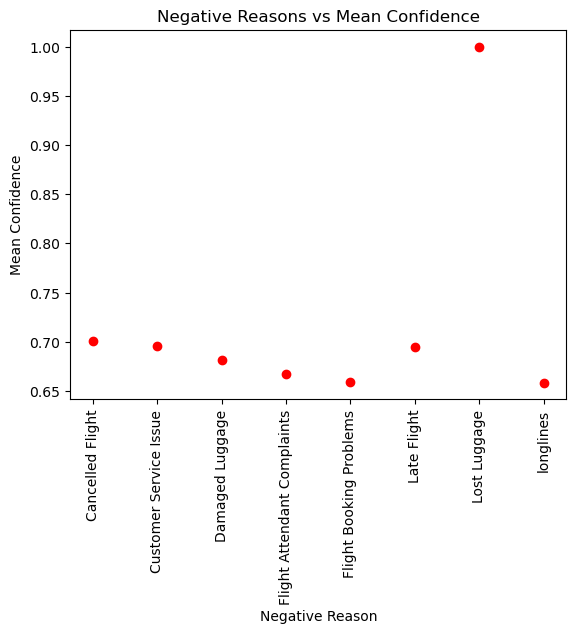

In [20]:
# group data by negative reason and compute median confidence
grouped_data = tweetsDf.groupby('negativereason')['negativereason_confidence'].median()

# create scatter plot
plt.scatter(grouped_data.index, grouped_data, c='red')
plt.xticks(rotation=90)
plt.xlabel('Negative Reason')
plt.ylabel('Mean Confidence')
plt.title('Negative Reasons vs Mean Confidence')
plt.show()

In [21]:
print(tweetsDf.isnull().sum())

# Check for empty spaces
for col in tweetsDf.columns:
    if tweetsDf[col].dtype == object:
        print(f"{col}: {tweetsDf[col].str.isspace().sum()}")

airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
dtype: int64
airline_sentiment: 0
negativereason: 0
airline: 0


In [22]:
bin = [0, 0.2, 0.4, 0.6, 0.9, 1]

tweetsDf['Airline_Conf_Bucket']= pd.cut(tweetsDf['airline_sentiment_confidence'], bin)

print('Airline_Conf_Bucket:\n',(tweetsDf['Airline_Conf_Bucket']).head())

Airline_Conf_Bucket:
 15    (0.6, 0.9]
24    (0.9, 1.0]
25    (0.9, 1.0]
30    (0.9, 1.0]
32    (0.9, 1.0]
Name: Airline_Conf_Bucket, dtype: category
Categories (5, interval[float64, right]): [(0.0, 0.2] < (0.2, 0.4] < (0.4, 0.6] < (0.6, 0.9] < (0.9, 1.0]]


In [23]:
bin = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

tweetsDf['NegReason_Conf_Bucket']= pd.cut(tweetsDf['negativereason_confidence'], bin)

print('NegReason_Conf_Bucket:\n',(tweetsDf['NegReason_Conf_Bucket']).head())

NegReason_Conf_Bucket:
 15    (0.3, 0.4]
24    (0.3, 0.4]
25    (0.9, 1.0]
30    (0.9, 1.0]
32    (0.9, 1.0]
Name: NegReason_Conf_Bucket, dtype: category
Categories (10, interval[float64, right]): [(0.0, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]


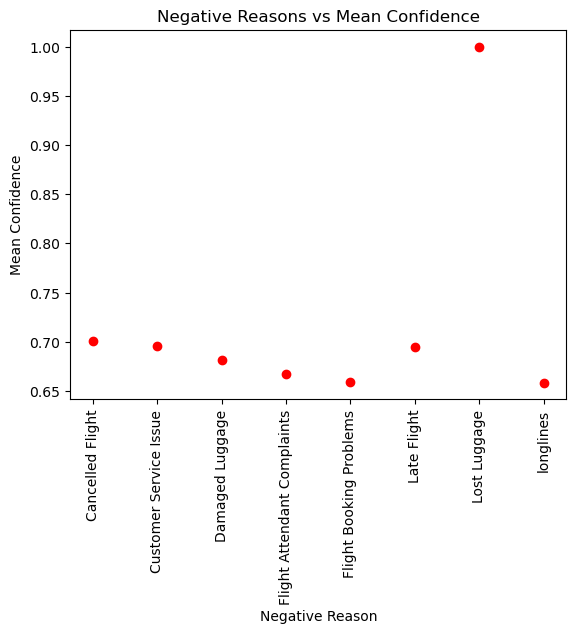

In [24]:
# group data by negative reason and compute median confidence(Post Col drops)
grouped_data1 = tweetsDf.groupby('negativereason')['negativereason_confidence'].median()

# create scatter plot
plt.scatter(grouped_data1.index, grouped_data1, c='red')
plt.xticks(rotation=90)
plt.xlabel('Negative Reason')
plt.ylabel('Mean Confidence')
plt.title('Negative Reasons vs Mean Confidence')
plt.show()

<Figure size 2000x4000 with 0 Axes>

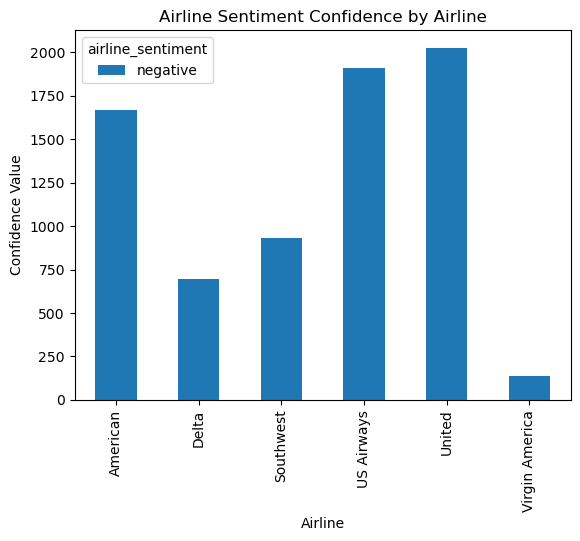

In [25]:
tweetsDf=tweetsDf[tweetsDf['airline_sentiment_confidence'] > .5]
grouped1= tweetsDf.groupby(['airline','airline_sentiment' ]).size().unstack()

fig = plt.figure(figsize = (20,40))
grouped1.plot(kind='bar', stacked=False,)
plt.title('Airline Sentiment Confidence by Airline')
plt.xlabel('Airline')
plt.ylabel('Confidence Value')
plt.show()

<Figure size 2000x4000 with 0 Axes>

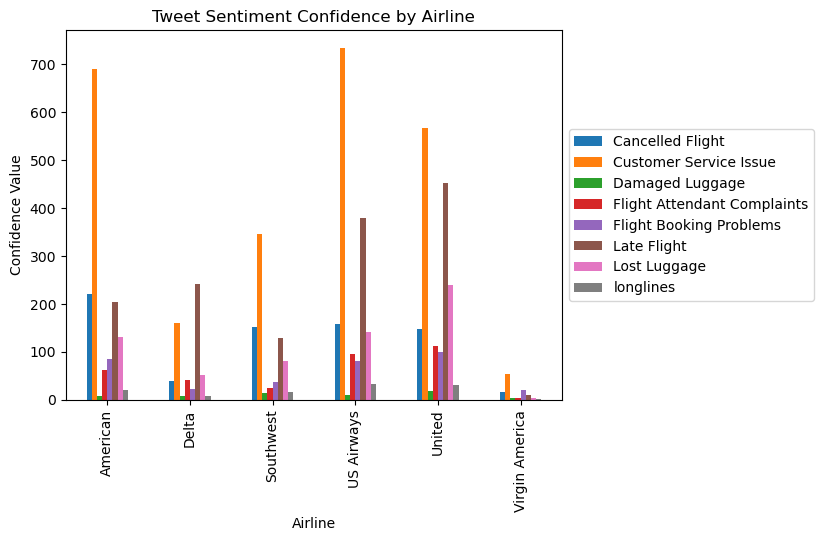

In [26]:
tweetsDf=tweetsDf[tweetsDf['negativereason_confidence'] > .5]
grouped= tweetsDf.groupby(['airline','negativereason' ]).size().unstack()

fig = plt.figure(figsize = (20,40))
grouped.plot(kind='bar', stacked=False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=10)
plt.title('Tweet Sentiment Confidence by Airline')
plt.xlabel('Airline')
plt.ylabel('Confidence Value')
plt.show()

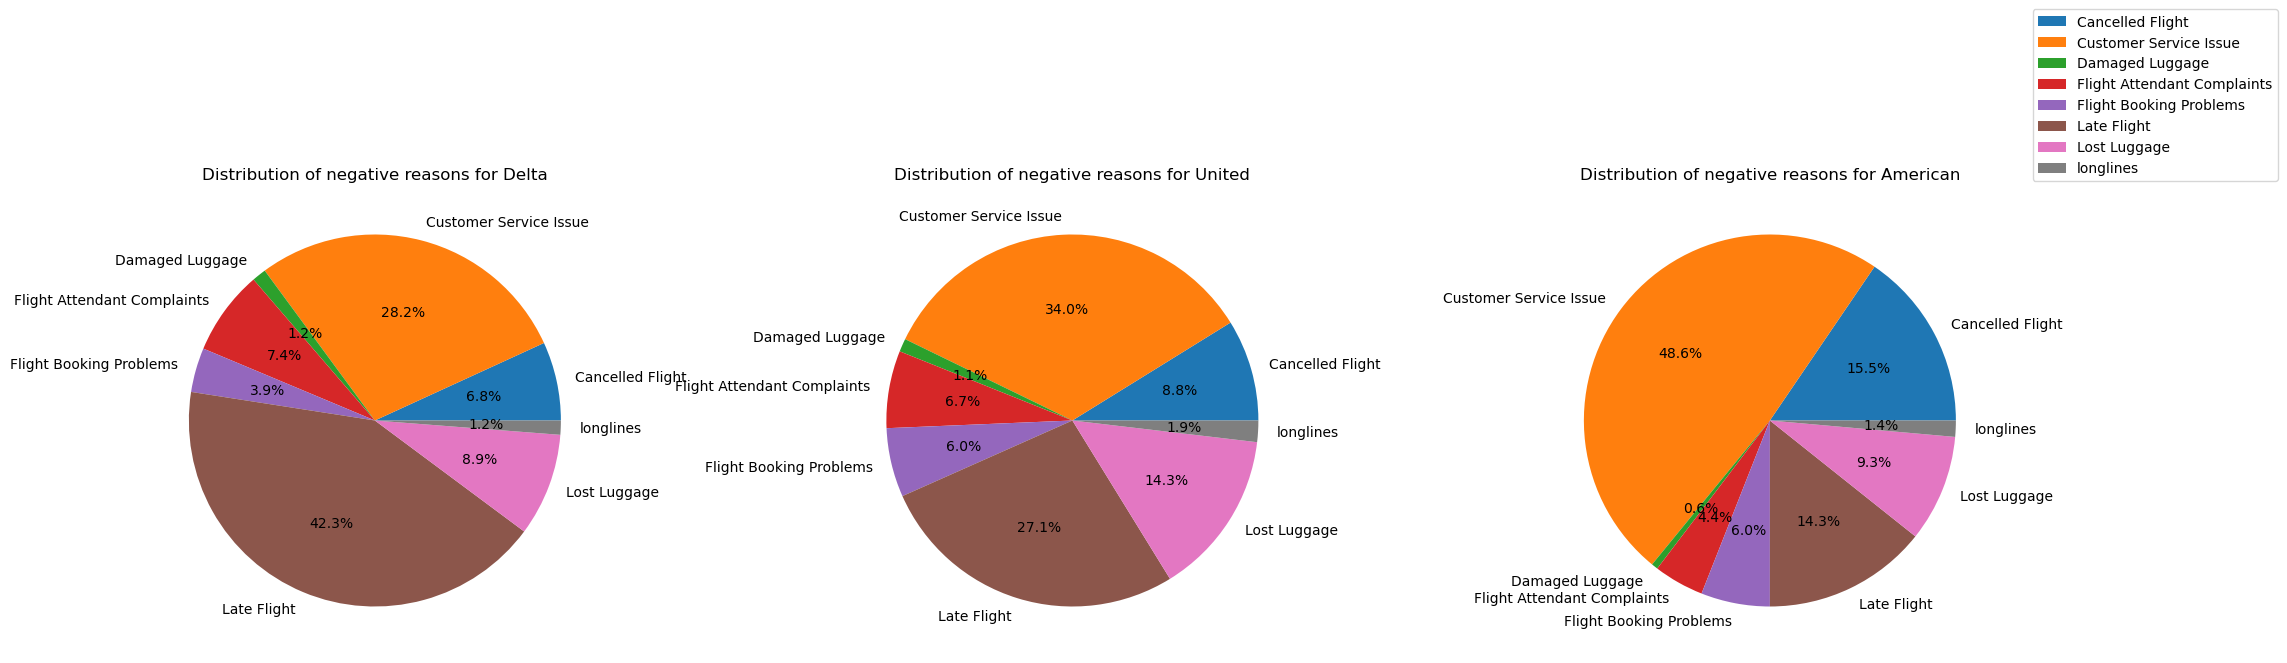

In [27]:
# filter dataframe to only include rows with specific airlines
airlines = ['Delta', 'United', 'American']
filtered_df = tweetsDf[tweetsDf['airline'].isin(airlines)]

# create a figure with one subplot for each airline
fig, axs = plt.subplots(1, len(airlines), figsize=(8 * len(airlines), 8))

# adjust spacing between subplots
fig.subplots_adjust(wspace=0.5)

# create a pie chart for each airline
for i, airline in enumerate(airlines):
    # filter data for the current airline
    airline_data = filtered_df[filtered_df['airline'] == airline]
    
    # group by negativereason
    grouped_data = airline_data.groupby('negativereason').size()
    
    # plot pie chart
    axs[i].pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%')
    axs[i].set_title(f'Distribution of negative reasons for {airline}')

#plt.legend()

# move legend to the right of the subplots
plt.legend(bbox_to_anchor=(1.05, 1), loc='lower left')
plt.show()

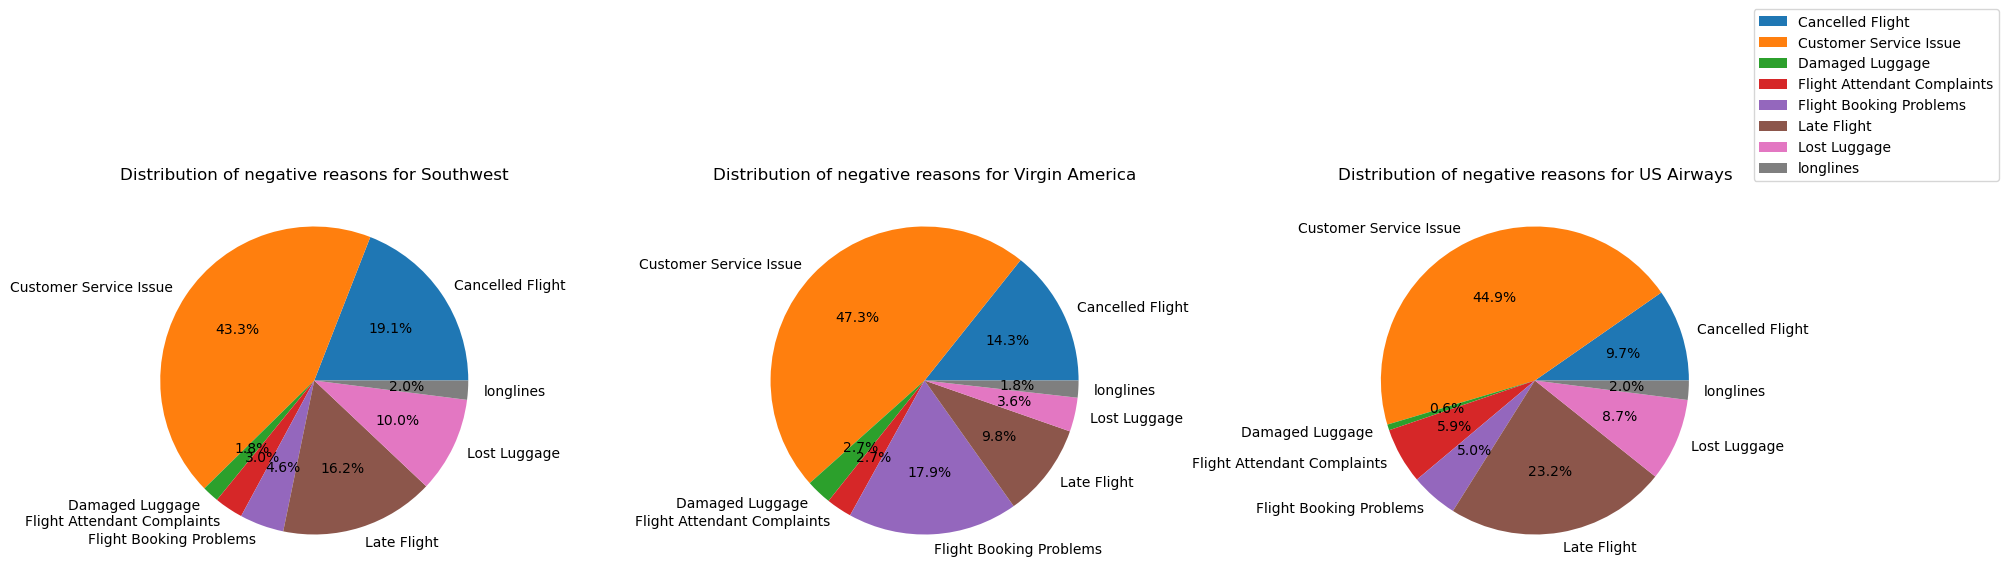

In [28]:
# filter dataframe to only include rows with specific airlines
airlines = ['Southwest', 'Virgin America', 'US Airways']
filtered_df = tweetsDf[tweetsDf['airline'].isin(airlines)]

# create a figure with one subplot for each airline
fig, axs = plt.subplots(1, len(airlines), figsize=(7 * len(airlines), 5))

# adjust spacing between subplots
fig.subplots_adjust(wspace=0.5)

# create a pie chart for each airline
for i, airline in enumerate(airlines):
    # filter data for the current airline
    airline_data = filtered_df[filtered_df['airline'] == airline]
    
    # group by negativereason
    grouped_data = airline_data.groupby('negativereason').size()
    
    # plot pie chart
    axs[i].pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%')
    axs[i].set_title(f'Distribution of negative reasons for {airline}')

# move legend to the right of the subplots
plt.legend(bbox_to_anchor=(1.05, 1), loc='lower left')
plt.show()

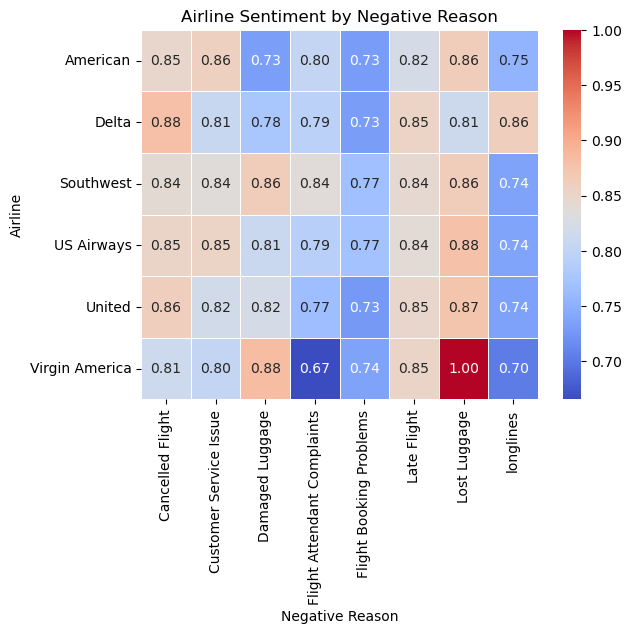

In [29]:
# create pivot table
pivot_table = tweetsDf.pivot_table(index='airline', columns='negativereason', values='negativereason_confidence')

# create heatmap
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)

# set plot title and axis labels
plt.title('Airline Sentiment by Negative Reason')
plt.xlabel('Negative Reason')
plt.ylabel('Airline')
plt.show()

# K-Means ALG has been choosen!

After using K-means clustering, we can use the cluster labels assigned to each data point to make predictions. For example, if we have a new data point and you want to predict which cluster it belongs to, we can use the K-means model to predict its cluster label based on its features.

Regarding our data, since we have already stripped out the positive and neutral sentiments and only have negative sentiments along with their reasons and confidence scores, we can use this data to perform K-means clustering. We can treat each negative reason as a feature, and each row in our data as a data point with a corresponding confidence score. We can then perform K-means clustering on this data to identify common negative reasons in the airline industry and their likelihood of occurring again based on the confidence scores.


# What is K-means???

The K-means algorithm starts by randomly selecting K initial cluster centers from the data points. Then, it assigns each data point to its nearest cluster center based on the Euclidean distance metric. After the initial assignment, the algorithm recomputes the cluster centers as the mean of all data points assigned to each cluster. It repeats the assignment and center computation steps until the cluster assignments no longer change or a maximum number of iterations is reached.

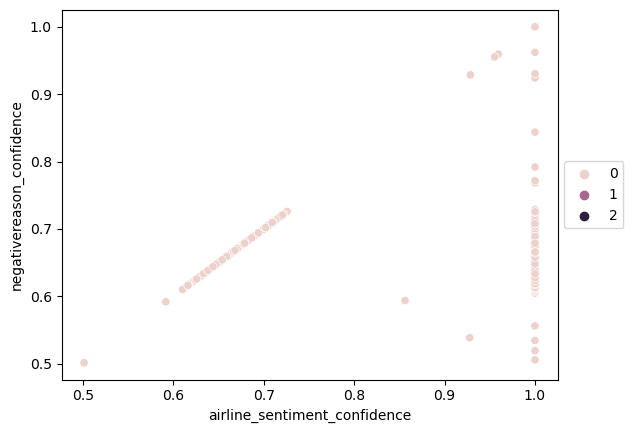

In [30]:
#Here is the revised code with comments added:

# Select columns for clustering
X = tweetsDf[['negativereason_confidence', 'airline_sentiment_confidence']]
# One-hot encode categorical variable
X = pd.get_dummies(X, columns=['negativereason_confidence'])

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform KMeans clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

# Plot the clusters
import matplotlib.pyplot as plt
import seaborn as sns

# Add cluster assignments to the dataframe
tweetsDf['cluster'] = kmeans.labels_

# Plot the clusters
sns.scatterplot(x='airline_sentiment_confidence', y='negativereason_confidence', hue='cluster', data=tweetsDf)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=10)
plt.show()

The Silhouette Score measures how well each data point fits its assigned cluster and ranges from -1 to 1, where a higher score indicates better clustering. 

Calinski-Harabasz is a clustering evaluation metric that measures the ratio between the within-cluster dispersion and the between-cluster dispersion. The metric compares the variance between the clusters to the variance within the clusters and seeks to maximize the former while minimizing the latter. A higher Calinski-Harabasz score indicates a better clustering performance, meaning that the clusters are well-separated and compact.

The Davies-Bouldin index is a clustering validation metric that measures the average similarity between each cluster and its most similar cluster, compared to the distance between the clusters. It is defined as the ratio of the sum of the within-cluster distances to the between-cluster distances. A lower Davies-Bouldin index indicates better clustering, with a value of 0 indicating perfectly separated clusters. It is similar to the Calinski-Harabasz index but does not depend on the assumption of spherical clusters and is less sensitive to outliers.


In [31]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans

# Fit KMeans clustering on the data
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

print("Kmeans: ")

# Compute silhouette score
kMeans_silhouette_score = silhouette_score(X_scaled, kmeans.labels_)

# Compute Calinski-Harabasz index
kMeans_calinski_harabasz_score = calinski_harabasz_score(X_scaled, kmeans.labels_)

# Compute Davies-Bouldin index
kMeans_davies_bouldin_score = davies_bouldin_score(X_scaled, kmeans.labels_)



Kmeans: 


# Agglomerative Clustering
Agglomerative Clustering: Used to group together similar data points in a dataset. This is a hierarchical clustering algorithm that iteratively merges the closest pairs of clusters until all the data is in one cluster.

The agglomerative clustering algorithm proceeds as follows:

1. Start by treating each data point as a separate cluster.
2. Compute the distance between all pairs of clusters based on a distance metric, such as Euclidean distance or Manhattan distance.
3. Merge the two closest clusters into a new cluster.
4. Recompute the distances between the new cluster and the remaining clusters.
5. Repeat steps 3 and 4 until all data points belong to a single cluster.

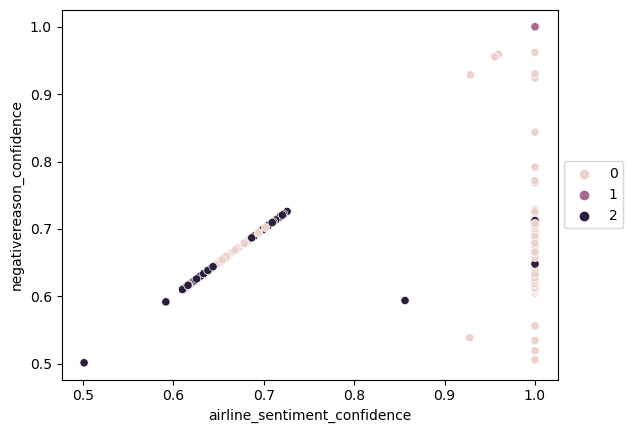

In [32]:
# Perform Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(X_scaled)

# Add cluster assignments to the dataframe
tweetsDf['cluster'] = agg_clustering.labels_

# Plot the clusters
import seaborn as sns
sns.scatterplot(x='airline_sentiment_confidence', y='negativereason_confidence', hue='cluster', data=tweetsDf)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=10)
plt.show()

In [33]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

print("AgglomerativeClustering: ")

# Compute silhouette score
agCluster_silhouette_score = silhouette_score(X_scaled, agg_clustering.labels_)

# Compute Calinski-Harabasz index
agCluster_calinski_harabasz_score = calinski_harabasz_score(X_scaled, agg_clustering.labels_)

# Compute Davies-Bouldin index
agCluster_davies_bouldin_score = davies_bouldin_score(X_scaled, agg_clustering.labels_)



AgglomerativeClustering: 


# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN: This is a density-based clustering algorithm that groups together points that are in high-density regions and marks points in low-density regions as noise. It is particularly useful for discovering clusters of arbitrary shape and size in data with noise and outliers.

The DBSCAN algorithm works by defining a neighborhood around each data point based on a distance metric and a radius parameter, and then finding densely populated regions in the data by identifying areas where many points are within the radius of each other. It classifies each point as a core point, a boundary point, or a noise point, based on its location in the neighborhood of other points.

The DBSCAN algorithm has two main parameters:

Epsilon (ε): the radius of the neighborhood around each data point. Points within this radius are considered neighbors.

Minimum points (minPts): the minimum number of points required to form a dense region. Points with fewer than minPts neighbors are considered outliers.

The algorithm starts by randomly selecting an unvisited point and expanding its neighborhood until a dense region is formed. Then, it continues the process with other unvisited points until all points have been classified into one of the two categories.

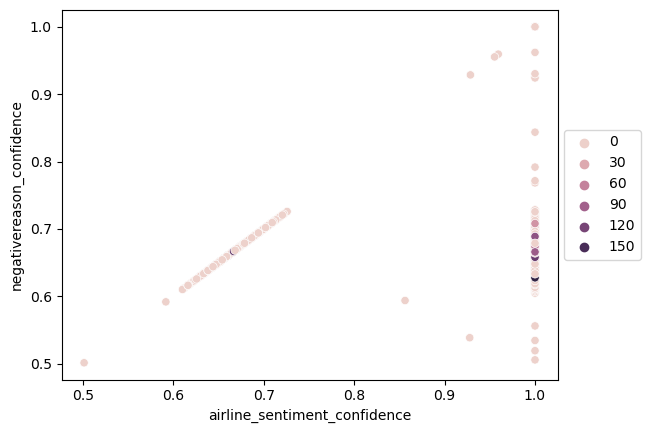

In [34]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

tweetsDf['cluster'] = dbscan.labels_
sns.scatterplot(x='airline_sentiment_confidence', y='negativereason_confidence', hue='cluster', data=tweetsDf)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=10)
plt.show()

In [35]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

print("DBSCAN: ")

# Compute silhouette score
dbScan_silhouette_score = silhouette_score(X_scaled, dbscan.labels_)

# Compute Calinski-Harabasz index
dbScan_calinski_harabasz_score = calinski_harabasz_score(X_scaled, dbscan.labels_)

# Compute Davies-Bouldin index
dbScan_davies_bouldin_score = davies_bouldin_score(X_scaled, dbscan.labels_)



DBSCAN: 


In [36]:
# Comparing results between the three

#Kmeans

print("Kmeans: ")
print("Silhouette score: ", kMeans_silhouette_score)
print("Calinski-Harabasz index: ", kMeans_calinski_harabasz_score)
print("Davies-Bouldin index: ", kMeans_davies_bouldin_score)

print(" ")

#AgglomerativeClustering
print("AgglomerativeClustering: ")
print("Silhouette score: ", agCluster_silhouette_score)
print("Calinski-Harabasz index: ", agCluster_calinski_harabasz_score)
print("Davies-Bouldin index: ", agCluster_davies_bouldin_score)

print(" ")

#DBSCAN
print("DBSCAN: ")
print("Silhouette score: ", dbScan_silhouette_score)
print("Calinski-Harabasz index: ", dbScan_calinski_harabasz_score)
print("Davies-Bouldin index: ", dbScan_davies_bouldin_score)



Kmeans: 
Silhouette score:  0.011014554085000782
Calinski-Harabasz index:  7.483057038643386
Davies-Bouldin index:  0.7480793727397982
 
AgglomerativeClustering: 
Silhouette score:  0.3289107355994235
Calinski-Harabasz index:  10.339787378260874
Davies-Bouldin index:  17.071118187767695
 
DBSCAN: 
Silhouette score:  0.5948497117673666
Calinski-Harabasz index:  7.102361713564841
Davies-Bouldin index:  1.9443334236039456


REPEATED SO USER DOESN'T HAVE TO SCROLL UP TO SEE WHAT SCORE AND INDEXS ARE 

The Silhouette Score measures how well each data point fits its assigned cluster and ranges from -1 to 1, where a higher score indicates better clustering.

Calinski-Harabasz is a clustering evaluation metric that measures the ratio between the within-cluster dispersion and the between-cluster dispersion. The metric compares the variance between the clusters to the variance within the clusters and seeks to maximize the former while minimizing the latter. A higher Calinski-Harabasz score indicates a better clustering performance, meaning that the clusters are well-separated and compact.

The Davies-Bouldin index is a clustering validation metric that measures the average similarity between each cluster and its most similar cluster, compared to the distance between the clusters. It is defined as the ratio of the sum of the within-cluster distances to the between-cluster distances. A lower Davies-Bouldin index indicates better clustering, with a value of 0 indicating perfectly separated clusters. It is similar to the Calinski-Harabasz index but does not depend on the assumption of spherical clusters and is less sensitive to outliers.

# Silhouette score:
1. DBSCAN
2. Agglomerative Clustering 
3. K-Means

so DBSCAN is better in measuring how well each data point fits its assigned cluster

# Calinski-Harabasz Index

1. Agglomerative Clustering
2. DBSCAN
3. K-Means

Agglomerative clustiering has the highest Calinski-Harabasz which means the data has a better clustering performance, meaning that the clusters are well-separated and compact.

# Davies-Bouldin Index
1. K-Means
2. DBSCAN
3. Agglomerative Clustering

K-means clustering has the lowest Davies-Bouldin which mens the data indicates better clustering & does not depend on the assumption of spherical clusters and is less sensitive to outliers.

# Which clustering would be better to use?

Based on the result I think the Agglomerative Clustering is the best to use beacause has a better clustering performance, meaning that the clusters are well-separated and compact.

# Multinomial NB

MultinomialNB (Multinomial Naive Bayes) is a probabilistic algorithm that is commonly used for text classification tasks, such as spam filtering, sentiment analysis, and topic modeling.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Convert the tweets into numerical features using CountVectorizer or TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(tweetsDf['negativereason'])
y = tweetsDf['airline_sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = mnb.predict(X_test)

# Evaluate the model's performance
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))

Accuracy: 1.0
Classification report:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00      1240

    accuracy                           1.00      1240
   macro avg       1.00      1.00      1.00      1240
weighted avg       1.00      1.00      1.00      1240



The output you provided shows the performance of a classification model on a test dataset. The model achieved an accuracy of 1.0, meaning that it correctly predicted the class label for all instances in the test dataset.

The classification report provides more detailed information about the model’s performance. It shows the precision, recall, and f1-score for each class, as well as their averages. In this case, there is only one class, “negative”, so the averages are equal to the values for that class.

Precision is the ratio of true positive predictions to the total number of positive predictions. In this case, it is 1.0, meaning that all instances predicted as “negative” were actually negative.

Recall is the ratio of true positive predictions to the total number of positive instances. In this case, it is also 1.0, meaning that all negative instances were correctly predicted as such.

The f1-score is the harmonic mean of precision and recall. It provides a single measure of the balance between precision and recall. In this case, it is also 1.0, indicating a perfect balance.

The support column shows the number of instances in each class in the test dataset. In this case, there were 1240 negative instances..

# DecisionTreeClassifier

DecisionTreeClassifier is a classification algorithm based on the concept of decision trees. It is a supervised learning algorithm that is mostly used for classification problems but can also be used for regression problems. The goal of the algorithm is to create a model that predicts the target variable value by learning simple decision rules inferred from the input features.

In [52]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))

Accuracy: 1.0
Classification report:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00      1482

    accuracy                           1.00      1482
   macro avg       1.00      1.00      1.00      1482
weighted avg       1.00      1.00      1.00      1482



# Which Algorithm would be better to use?

Based on the results Multinomial NB and DecisionTreeClassifier produces the same Precison, Recall, F1-Score, and Support. We think Multinomial NB may be a better algorithm to use first because there are many features that are independent of one another. Which means each Feature provides unique and distinct information about the data.